**🌍 WORLD HAPPINESS REPORT - EXPLORATORY DATA ANALYSIS**

In [8]:

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 5)



In [18]:
# 2) Upload the dataset from your machine to the Colab session
from google.colab import files
uploaded = files.upload()   # use the file chooser to select kaggle.json
# after upload, you'll see the dataset listed in uploaded.keys()


Saving World Happiness Report 2023.csv to World Happiness Report 2023.csv


In [19]:
# Step 3: Load the data and have a quick look
df = pd.read_csv('/content/World Happiness Report 2023.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (137, 21)


,Country name,iso alpha,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,AFG,South Asia,1.859,0.033,1.923,1.795,7.324,0.341,54.712,...,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,Albania,ALB,Central and Eastern Europe,5.277,0.066,5.406,5.148,9.567,0.718,69.150,...,-0.007,0.878,1.778,1.449,0.951,0.480,0.549,0.133,0.037,1.678
2,Algeria,DZA,Middle East and North Africa,5.329,0.062,5.451,5.207,9.300,0.855,66.549,...,-0.117,0.717,1.778,1.353,1.298,0.409,0.252,0.073,0.152,1.791
3,Argentina,ARG,Latin America and Caribbean,6.024,0.063,6.147,5.900,9.959,0.891,67.200,...,-0.089,0.814,1.778,1.590,1.388,0.427,0.587,0.088,0.082,1.861
4,Armenia,ARM,Commonwealth of Independent States,5.342,0.066,5.470,5.213,9.615,0.790,67.789,...,-0.155,0.705,1.778,1.466,1.134,0.443,0.551,0.053,0.160,1.534


In [20]:
# Check for missing values
print("Missing values per column:\n", df.isna().sum())

# Rename columns to lowercase and remove spaces
df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)

# Display cleaned column names
print("Cleaned Columns:", df.columns.tolist())


Missing values per column:
 Country name                                  0
iso alpha                                     0
Regional indicator                            0
Happiness score                               0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + r

In [21]:
# Summary Statistics
df.describe()

,happiness_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [30]:
df.columns

Index(['country_name', 'iso_alpha', 'regional_indicator', 'happiness_score',
       'standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'],
      dtype='object')

**Visualizations and Insights**



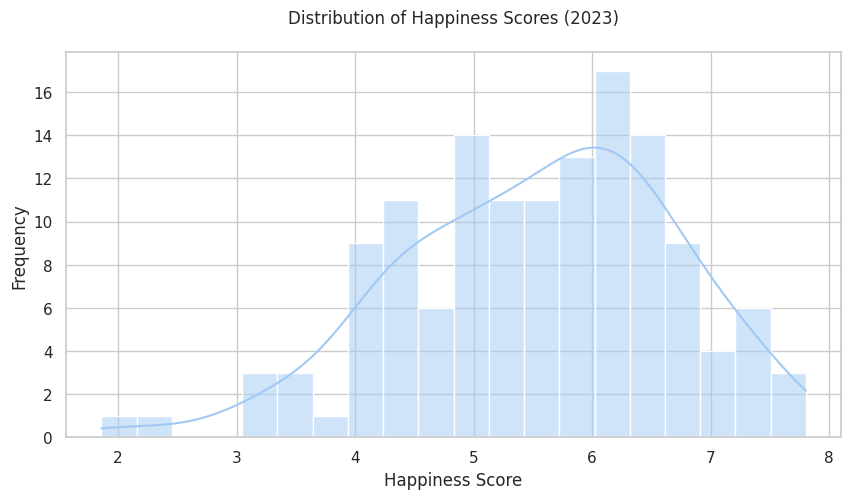

In [39]:
#Happiness Score Distribution

sns.histplot(df['happiness_score'], kde=True, bins=20)
plt.title("Distribution of Happiness Scores (2023)\n")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()

**Insight**

Happiness scores are roughly normally distributed, with most countries scoring between 4 and 7.

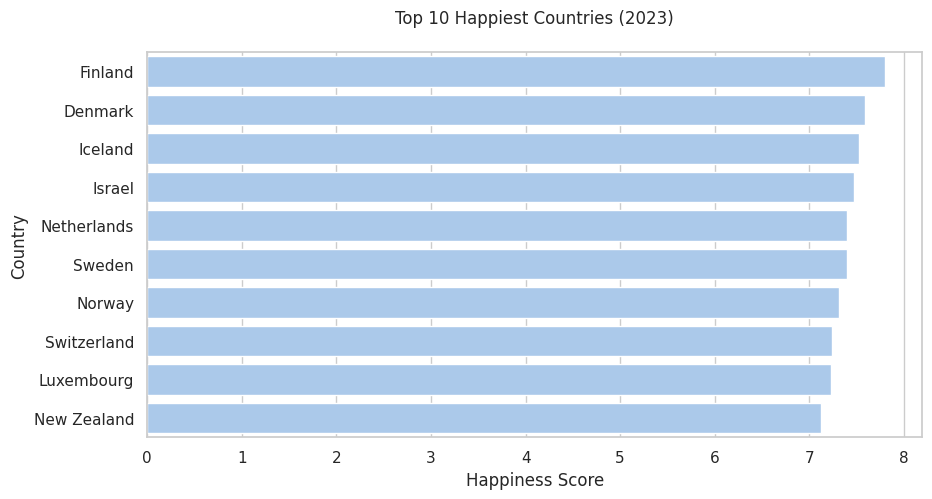

In [38]:
# Top 10 Happiest Countries

top10 = df.nlargest(10, 'happiness_score')
sns.barplot(x='happiness_score', y='country_name', data=top10)
plt.title("Top 10 Happiest Countries (2023)\n")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()


**Insight**

Northern European countries dominate the top 10, with Finland, Denmark, and Iceland consistently leading global happiness rankings.

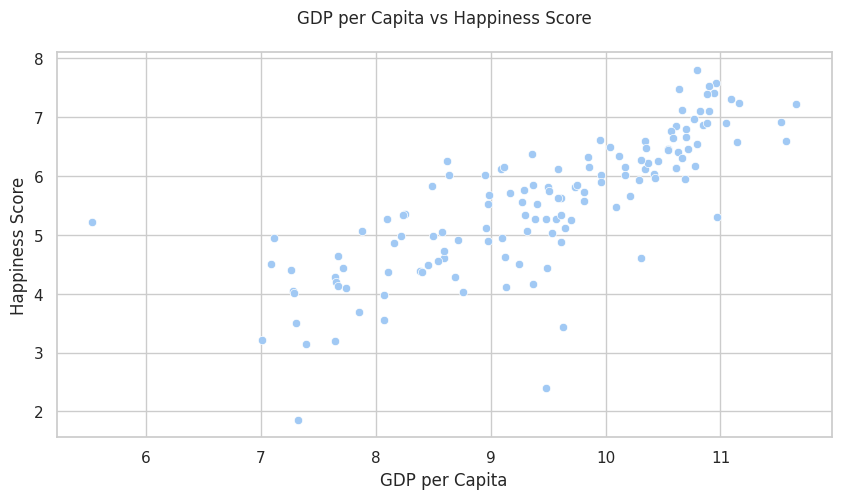

In [37]:
# GDP per Capita

sns.scatterplot(x='logged_gdp_per_capita', y='happiness_score', data=df)
plt.title("GDP per Capita vs Happiness Score\n")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()


**Insight**

There’s a positive relationship between GDP per capita and happiness, though some outliers (e.g., high-GDP countries with moderate happiness) show that money isn't the only factor.

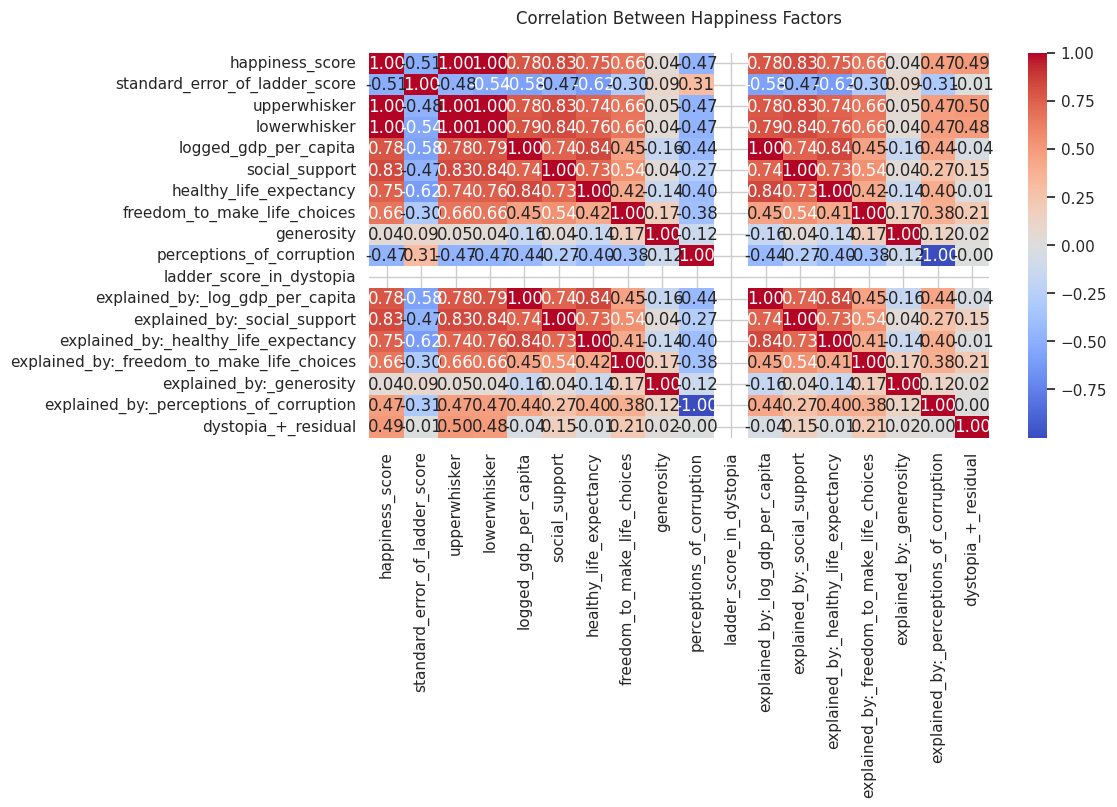

In [36]:
# Correlation Map

numeric_cols = df.select_dtypes(include=['float64']).corr()
sns.heatmap(numeric_cols, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Happiness Factors\n")
plt.show()


**Insight**

Social support, healthy life expectancy, and GDP per capita are the strongest positive correlates of happiness scores.

**Conclusion:**
- Happiness is multi-dimensional: income, health, and social factors all matter.
- Top-performing countries share strong social systems and high trust levels.
- Data like this can inform policymakers on improving citizen well-being.